In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

/Share/home/shibinbin/projects/exRNA


In [28]:
import pandas as pd
import seaborn as sns
sns.set()
from scipy.cluster import hierarchy

In [62]:
df = pd.read_csv('figures/data/forcluster.csv', index_col=0)
df.index.name = 'Feature'
importance = df['importance']
df = df.drop(columns=['importance'])
labels = np.asarray([s.split('.')[0] for s in df.columns])
#df = df.iloc[:, np.argsort(labels)]
df.head()

,A,A.1,C,A.2,B,B.1,B.2,A.3,A.4,B.3,...,HD.3,HD.4,HD.5,HD.6,HD.7,HD.8,HD.9,HD.10,HD.11,HD.12
Feature,,,,,,,,,,,,,,,,,,,,,
0,-0.826845,1.484728,-0.914825,0.280719,0.152354,1.634993,-0.241918,1.431475,-0.793273,0.112256,...,0.002175,-0.006238,-1.138205,-1.138205,-1.138205,-0.580402,-0.508730,-0.248746,-1.138205,-1.138205
1,-0.635322,-0.188970,-0.660799,-0.637850,0.443984,1.456324,-0.070205,1.857073,-0.426154,0.359341,...,-0.853559,-0.853559,-0.853559,-0.853559,-0.853559,-0.853559,-0.345075,-0.853559,-0.853559,-0.853559
2,-0.952742,-0.391658,1.063404,-0.815840,-0.567604,0.426535,1.324619,2.030802,-0.225656,-0.283746,...,-1.011879,-1.011879,-1.011879,-1.011879,-1.011879,-1.011879,-1.011879,-0.358902,-1.011879,-1.011879
3,0.078486,0.305597,0.773008,-1.595444,0.146864,1.402746,0.898105,0.284779,1.341386,1.547305,...,-1.595444,-0.773339,-1.003260,-1.595444,0.186006,-0.931010,0.777758,0.076323,-1.595444,-1.595444
4,-0.415388,0.092073,-0.322123,-1.059398,-0.032302,-1.059398,0.434431,-1.059398,0.673334,0.720228,...,-1.059398,1.099885,-1.059398,-1.059398,-1.059398,-0.233063,-1.059398,-1.059398,-1.059398,-1.059398


In [18]:
sns.choose_diverging_palette()

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_pos', max=359), IntSlider(value=74, description='s', max=99), IntSlider(value=50, description='l', max=99), IntSlider(value=10, description='sep', max=50, min=1), IntSlider(value=9, description='n', max=16, min=2), Dropdown(description='center', options=('light', 'dark'), value='light'), Output()), _dom_classes=('widget-interact',))

[array([0.25199714, 0.49873371, 0.57516028, 1.        ]),
 array([0.43026136, 0.62000665, 0.67878019, 1.        ]),
 array([0.60852558, 0.74127959, 0.7824001 , 1.        ]),
 array([0.7867898 , 0.86255253, 0.88602001, 1.        ]),
 array([0.95, 0.95, 0.95, 1.  ]),
 array([0.95457726, 0.76653099, 0.78032569, 1.        ]),
 array([0.91971827, 0.58735877, 0.61174   , 1.        ]),
 array([0.88485928, 0.40818655, 0.44315432, 1.        ]),
 array([0.85104086, 0.23436275, 0.27960104, 1.        ])]

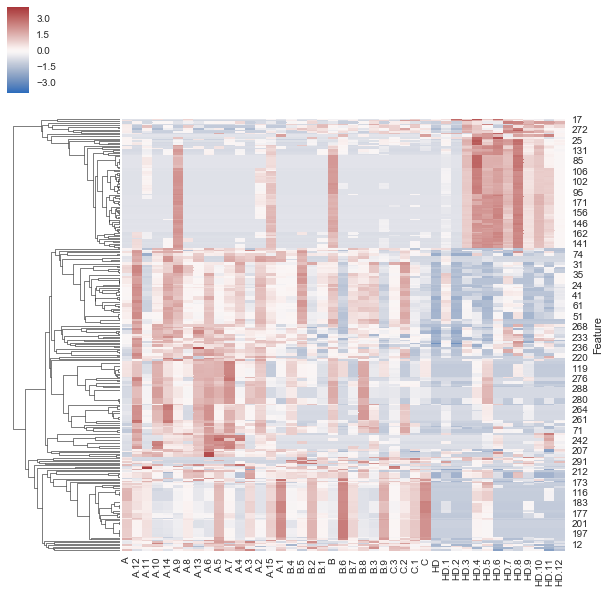

In [63]:
sns.clustermap(df.iloc[:, np.argsort(labels)], vmin=-4, vmax=4, cmap="vlag", col_cluster=False)

In [57]:
col_orders

array(['A.1', 'B.9', 'C', 'A', 'C.1', 'A.3', 'B.4', 'B.3', 'B.1', 'B.7',
       'A.12', 'A.2', 'A.6', 'A.7', 'A.10', 'A.13', 'A.15', 'A.9', 'B',
       'A.14', 'B.8', 'A.5', 'B.2', 'A.4', 'A.8', 'C.3', 'B.5', 'C.2',
       'A.11', 'B.6', 'HD.3', 'HD.7', 'HD.9', 'HD.10', 'HD.11', 'HD',
       'HD.2', 'HD.1', 'HD.12', 'HD.4', 'HD.5', 'HD.6', 'HD.8'],
      dtype='<U5')

In [60]:
df.columns[labels == 'A']

Index(['A', 'A.12', 'A.10', 'A.13', 'A.6', 'A.7', 'A.3', 'A.2', 'A.1', 'B.4',
       'B.1', 'B.7', 'B.3', 'B.9', 'C.1', 'C'],
      dtype='object')

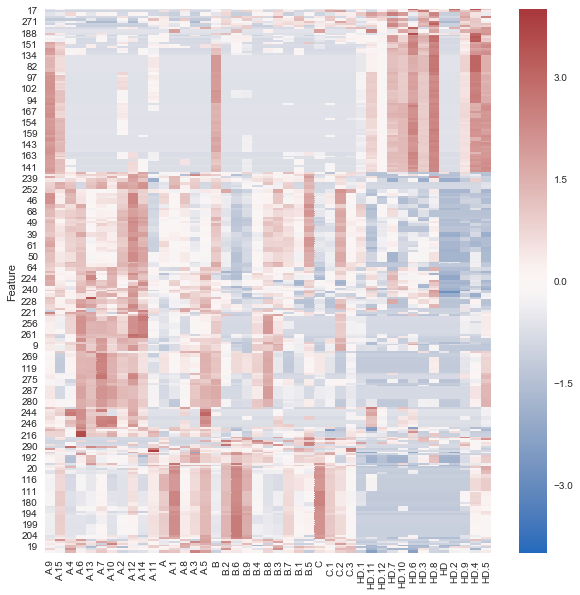

In [68]:
Z = hierarchy.linkage(df.values, method='average', metric='correlation')
den = hierarchy.dendrogram(Z, no_plot=True)
row_orders = list(map(int, den['ivl']))
col_orders = []
for label in ['A', 'B', 'C', 'HD']:
    sample_ids = df.columns[labels == label]
    Z = hierarchy.linkage(df.values[:, labels == label].T, 'average', metric='correlation')
    den = hierarchy.dendrogram(Z, no_plot=True)
    order = list(map(int, den['ivl']))
    col_orders += sample_ids[order].tolist()
col_orders = np.asarray(col_orders)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.loc[row_orders, col_orders], vmin=-4, vmax=4, cmap="vlag", ax=ax)

In [56]:
labels

array(['A', 'A', 'C', 'A', 'B', 'B', 'B', 'A', 'A', 'B', 'A', 'B', 'A',
       'A', 'B', 'A', 'A', 'C', 'B', 'A', 'B', 'C', 'A', 'B', 'A', 'A',
       'B', 'C', 'A', 'A', 'HD', 'HD', 'HD', 'HD', 'HD', 'HD', 'HD', 'HD',
       'HD', 'HD', 'HD', 'HD', 'HD'], dtype='<U2')

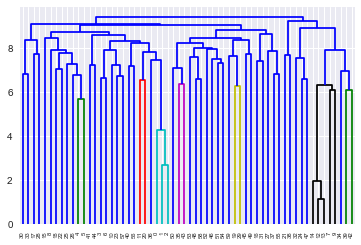

In [33]:
Z = hierarchy.linkage(df.values, 'average')
den = hierarchy.dendrogram(Z)

In [34]:
den.keys()

dict_keys(['icoord', 'dcoord', 'ivl', 'leaves', 'color_list'])

In [45]:
pd.read_csv('/home/chenxupeng/projects/training/forcluster.csv', index_col=0).head()

,A,A.1,C,A.2,B,B.1,B.2,A.3,A.4,B.3,...,HD.4,HD.5,HD.6,HD.7,HD.8,HD.9,HD.10,HD.11,HD.12,importance
0,-0.826845,1.484728,-0.914825,0.280719,0.152354,1.634993,-0.241918,1.431475,-0.793273,0.112256,...,-0.006238,-1.138205,-1.138205,-1.138205,-0.580402,-0.508730,-0.248746,-1.138205,-1.138205,-0.000195
1,-0.635322,-0.188970,-0.660799,-0.637850,0.443984,1.456324,-0.070205,1.857073,-0.426154,0.359341,...,-0.853559,-0.853559,-0.853559,-0.853559,-0.853559,-0.345075,-0.853559,-0.853559,-0.853559,-0.000393
2,-0.952742,-0.391658,1.063404,-0.815840,-0.567604,0.426535,1.324619,2.030802,-0.225656,-0.283746,...,-1.011879,-1.011879,-1.011879,-1.011879,-1.011879,-1.011879,-0.358902,-1.011879,-1.011879,-0.004077
3,0.078486,0.305597,0.773008,-1.595444,0.146864,1.402746,0.898105,0.284779,1.341386,1.547305,...,-0.773339,-1.003260,-1.595444,0.186006,-0.931010,0.777758,0.076323,-1.595444,-1.595444,-0.000264
4,-0.415388,0.092073,-0.322123,-1.059398,-0.032302,-1.059398,0.434431,-1.059398,0.673334,0.720228,...,1.099885,-1.059398,-1.059398,-1.059398,-0.233063,-1.059398,-1.059398,-1.059398,-1.059398,-0.000743
